In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)

In [2]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [3]:
%%bigquery trips
SELECT * FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'

Downloading: 100%|██████████| 24381318/24381318 [00:17<00:00, 1403003.12rows/s]


In [4]:
%%bigquery stations
SELECT * FROM `bigquery-public-data.new_york_citibike.citibike_stations` 

Downloading: 100%|██████████| 1584/1584 [00:01<00:00, 1361.29rows/s]


In [5]:
%%bigquery
SELECT EXTRACT(DAYOFWEEK FROM starttime), count(*) FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
group by 1
#and 

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.66rows/s]


,f0_,f1_
0,3,3707404
1,4,3910812
2,1,2906025
3,5,3848877
4,7,3013075
5,6,3597008
6,2,3398117


In [6]:
stations.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720664,-73.985180,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743174,-74.003664,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01


In [7]:
stations.isna().sum(), stations.shape

(station_id                   0
 name                         0
 short_name                   0
 latitude                     0
 longitude                    0
 region_id                    6
 rental_methods               0
 capacity                     0
 eightd_has_key_dispenser     0
 num_bikes_available          0
 num_bikes_disabled           0
 num_docks_available          0
 num_docks_disabled           0
 is_installed                 0
 is_renting                   0
 is_returning                 0
 eightd_has_available_keys    0
 last_reported                0
 dtype: int64,
 (1584, 18))

In [8]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,479,2017-10-10 21:45:54,2017-10-10 21:53:53,261,Johnson St & Gold St,40.694749,-73.983625,407,Henry St & Poplar St,40.700469,-73.991454,18105,Subscriber,1990.0,male,
1,1632,2016-08-20 16:06:24,2016-08-20 16:33:36,499,Broadway & W 60 St,40.769155,-73.981918,3137,5 Ave & E 73 St,40.772828,-73.966853,24076,Customer,NaN,unknown,
2,155,2017-08-27 01:10:41,2017-08-27 01:13:16,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,-73.958509,27137,Subscriber,1982.0,male,
3,604,2016-03-30 09:01:47,2016-03-30 09:11:51,448,W 37 St & 10 Ave,40.756604,-73.997901,402,Broadway & E 22 St,40.740343,-73.989551,20825,Subscriber,1984.0,male,
4,323,2016-06-15 23:48:59,2016-06-15 23:54:22,373,Willoughby Ave & Walworth St,40.693317,-73.953820,3061,Throop Ave & Myrtle Ave,40.696229,-73.943711,23032,Subscriber,1985.0,male,


In [9]:
trips.isna().sum(), trips.shape

(tripduration                     0
 starttime                        0
 stoptime                         0
 start_station_id                 0
 start_station_name               0
 start_station_latitude           0
 start_station_longitude          0
 end_station_id                   0
 end_station_name                 0
 end_station_latitude             0
 end_station_longitude            0
 bikeid                           0
 usertype                         0
 birth_year                 2802435
 gender                           0
 customer_plan                    0
 dtype: int64,
 (24381318, 16))

In [10]:
# No significant Null Values

In [11]:
# First Exploring the stations data:

stations.describe(include = 'all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
count,1584.000000,1584,1584,1584.000000,1584.000000,1578.000000,1584,1584.000000,1584,1584.000000,1584.000000,1584.000000,1584.000000,1584,1584,1584,1584,1584
unique,NaN,1584,1584,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,2,2,2,1,8
top,NaN,MacDougal St & Prince St,5687.04,NaN,NaN,NaN,"CREDITCARD,KEY",NaN,False,NaN,NaN,NaN,NaN,True,True,True,False,2021-11-09 00:00:00
freq,NaN,1,1,NaN,NaN,NaN,1584,NaN,1584,NaN,NaN,NaN,NaN,1555,1532,1532,1584,1103
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-09 00:00:00
mean,3330.566919,NaN,NaN,40.752561,-73.958292,75.072877,NaN,29.929924,NaN,14.527146,1.190657,14.060606,0.222222,NaN,NaN,NaN,NaN,NaN
std,1356.614557,NaN,NaN,0.061021,0.040638,31.138578,NaN,14.233883,NaN,14.434658,2.336832,11.951740,3.308881,NaN,NaN,NaN,NaN,NaN
min,72.000000,NaN,NaN,40.633385,-74.086701,70.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3213.750000,NaN,NaN,40.703973,-73.988796,71.000000,NaN,21.000000,NaN,3.000000,0.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

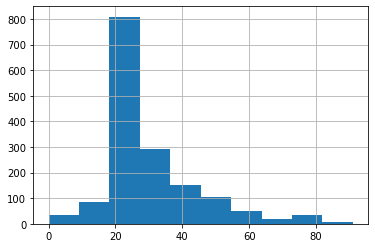

In [12]:
# 1584 unique stations
stations.capacity.hist()
# Most stations have a capacity between 20-40

In [13]:
# Regions

stations.region_id.unique().size
stations.region_id.value_counts(dropna = False)

#3 unique Regions

4

71.0     1498
70.0       53
311.0      27
NaN         6
Name: region_id, dtype: int64

<Figure size 288x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<Figure size 288x288 with 0 Axes>

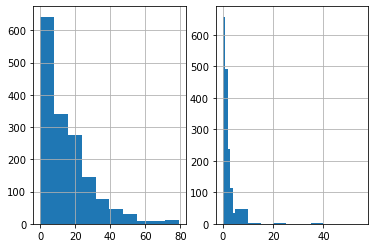

In [14]:
# No of Bikes AVAILABLE and DISABLED:
plt.figure(figsize=(4,4))
fig, (ax1,ax2) = plt.subplots(1, 2)
stations.num_bikes_available.hist(ax = ax1)
stations.num_bikes_disabled.hist(bins = (0,1,2,3,4,5,10,15,20,25,30,35,40,45,50,55))
#plt.figure(figsize=(10,8))

In [15]:
# Most stations have 5-20 available bikes and 2-3 disabled at most

<Figure size 288x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<Figure size 288x288 with 0 Axes>

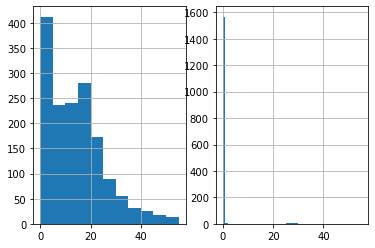

In [16]:
# No of DOCKS AVAILABLE and DISABLED:
plt.figure(figsize=(4,4))
fig, (ax1,ax2) = plt.subplots(1, 2)
stations.num_docks_available.hist(ax = ax1, bins = (0,5,10,15,20,25,30,35,40,45,50,55))
stations.num_docks_disabled.hist(bins = (0,1,2,3,4,5,10,15,20,25,30,35,40,45,50,55))
#plt.figure(figsize=(10,8))

In [17]:
# Most Stations have 5-20 Docks Aailable and almost all stations have 0 docks disabled

In [18]:
# Check how many stationsa are renting, returning, is_installed
DataFrame(stations.is_installed.value_counts())
DataFrame(stations.is_renting.value_counts())
DataFrame(stations.is_returning.value_counts())


,is_installed
True,1555
False,29


,is_renting
True,1532
False,52


,is_returning
True,1532
False,52


In [19]:
# Most Stations are Renting and Returning, almost 98% of all Stations and same holds for is_installed

In [20]:
#Removing the not required columns from stations dataframe, save this to stations_2 dataframe which will be joined to the trips dataframe
#Colums not useful:
#Lat/lon - present in trips data
#name, short_name, region_id, rental_methods - only 1 value, eightd_has_key_dispenser, eightd_has_avaiable_keys, last_reported, 
#is_installed, is_renting, is_returning - most stations (98%) have value true
# Num_bikes and Docks available and Disabled - not directly related to trips and most stations have similiar distribution hence ignoring for 1st analysis

stations_2 = stations[['station_id','name','capacity']]
stations_2.head(1)

,station_id,name,capacity
0,128,MacDougal St & Prince St,0


In [21]:
# IMP - Combining the trips and stations data using pd.merge

trips2 = pd.merge(trips, stations_2, how = 'left', left_on = 'start_station_id', right_on = 'station_id')


In [22]:
trips2.rename(columns={"name": "start_name", "capacity": "start_capacity"}, inplace = True)

In [23]:
trips2.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,station_id,start_name,start_capacity
0,479,2017-10-10 21:45:54,2017-10-10 21:53:53,261,Johnson St & Gold St,40.694749,-73.983625,407,Henry St & Poplar St,40.700469,-73.991454,18105,Subscriber,1990.0,male,,261.0,Johnson St & Gold St,41.0
1,1632,2016-08-20 16:06:24,2016-08-20 16:33:36,499,Broadway & W 60 St,40.769155,-73.981918,3137,5 Ave & E 73 St,40.772828,-73.966853,24076,Customer,NaN,unknown,,NaN,NaN,NaN
2,155,2017-08-27 01:10:41,2017-08-27 01:13:16,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,-73.958509,27137,Subscriber,1982.0,male,,2002.0,Wythe Ave & Metropolitan Ave,57.0
3,604,2016-03-30 09:01:47,2016-03-30 09:11:51,448,W 37 St & 10 Ave,40.756604,-73.997901,402,Broadway & E 22 St,40.740343,-73.989551,20825,Subscriber,1984.0,male,,448.0,W 37 St & 10 Ave,27.0
4,323,2016-06-15 23:48:59,2016-06-15 23:54:22,373,Willoughby Ave & Walworth St,40.693317,-73.953820,3061,Throop Ave & Myrtle Ave,40.696229,-73.943711,23032,Subscriber,1985.0,male,,373.0,Willoughby Ave & Walworth St,19.0


In [24]:
# Based on the above join we can see that joining the stations data to trips on id doesnt work since there are a lot of nulls 
# + the capcity column is not of much use for this analysis since we are more focused on trips and which stations can be closed to save costs

In [25]:
# Analysis of Trips Dataset:

trips.head()
trips.dtypes

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,479,2017-10-10 21:45:54,2017-10-10 21:53:53,261,Johnson St & Gold St,40.694749,-73.983625,407,Henry St & Poplar St,40.700469,-73.991454,18105,Subscriber,1990.0,male,
1,1632,2016-08-20 16:06:24,2016-08-20 16:33:36,499,Broadway & W 60 St,40.769155,-73.981918,3137,5 Ave & E 73 St,40.772828,-73.966853,24076,Customer,NaN,unknown,
2,155,2017-08-27 01:10:41,2017-08-27 01:13:16,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,-73.958509,27137,Subscriber,1982.0,male,
3,604,2016-03-30 09:01:47,2016-03-30 09:11:51,448,W 37 St & 10 Ave,40.756604,-73.997901,402,Broadway & E 22 St,40.740343,-73.989551,20825,Subscriber,1984.0,male,
4,323,2016-06-15 23:48:59,2016-06-15 23:54:22,373,Willoughby Ave & Walworth St,40.693317,-73.953820,3061,Throop Ave & Myrtle Ave,40.696229,-73.943711,23032,Subscriber,1985.0,male,


tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                        float64
gender                             object
customer_plan                      object
dtype: object

In [26]:
# Exploratory Data Analysis and some obvious questions come to mind:

#1) Busiest times of day and days of week
#2) avg trip duration
#3) Most used stations
#4) Profile of Riders: age, gender and customer type
#5) Most Popular Rides by the start-end combinations

In [27]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,479,2017-10-10 21:45:54,2017-10-10 21:53:53,261,Johnson St & Gold St,40.694749,-73.983625,407,Henry St & Poplar St,40.700469,-73.991454,18105,Subscriber,1990.0,male,
1,1632,2016-08-20 16:06:24,2016-08-20 16:33:36,499,Broadway & W 60 St,40.769155,-73.981918,3137,5 Ave & E 73 St,40.772828,-73.966853,24076,Customer,NaN,unknown,
2,155,2017-08-27 01:10:41,2017-08-27 01:13:16,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,-73.958509,27137,Subscriber,1982.0,male,
3,604,2016-03-30 09:01:47,2016-03-30 09:11:51,448,W 37 St & 10 Ave,40.756604,-73.997901,402,Broadway & E 22 St,40.740343,-73.989551,20825,Subscriber,1984.0,male,
4,323,2016-06-15 23:48:59,2016-06-15 23:54:22,373,Willoughby Ave & Walworth St,40.693317,-73.953820,3061,Throop Ave & Myrtle Ave,40.696229,-73.943711,23032,Subscriber,1985.0,male,


In [28]:
# 1. TRIP Duration:
trips['starttime'] = pd.to_datetime(trips['starttime'])

In [29]:
trips['stoptime'] =  pd.to_datetime(trips['stoptime'])

In [30]:
trips['duration'] = (trips['stoptime'] - trips['starttime'])/np.timedelta64(1,'s')/60

In [31]:
trips['duration'].describe()
trips['duration'].mean()
trips['duration'].median()

count    2.438132e+07
mean     1.684741e+01
std      2.388626e+02
min     -5.733333e+01
25%      6.383333e+00
50%      1.065000e+01
75%      1.835000e+01
max      1.622658e+05
Name: duration, dtype: float64

16.847406628441238

10.65

In [32]:
# median trip duration is just 11 minutes and mean trip duration is just 16 minutes

<AxesSubplot:>

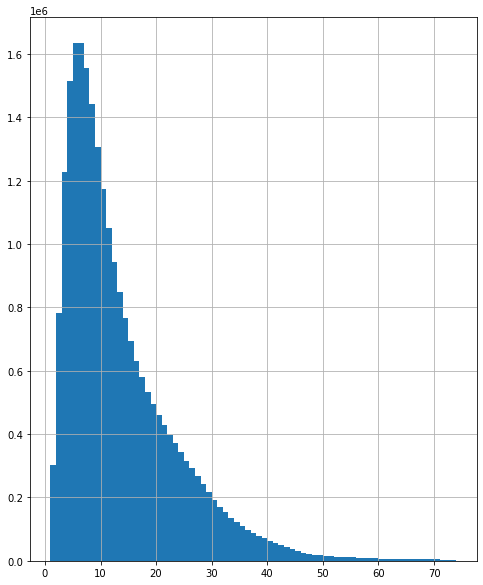

In [33]:
trips.duration.hist(bins = range(1,75), figsize=(8,10))

In [34]:
# most of the trip are less than 10 mins and the avg trip is about 5 mins in duration -- very short trips

In [35]:
#2 Busient Weekday/Weekends: Avg no of trip by day of week

trips['startday'] = pd.to_datetime(trips['starttime']).dt.day_name()
trips['start_month'] = pd.to_datetime(trips['starttime']).dt.month
trips['start_year'] = pd.to_datetime(trips['starttime']).dt.year
trips['start_day'] = pd.to_datetime(trips['starttime']).dt.day
trips['start_hour'] = pd.to_datetime(trips['starttime']).dt.hour

In [36]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,usertype,birth_year,gender,customer_plan,duration,startday,start_month,start_year,start_day,start_hour
0,479,2017-10-10 21:45:54,2017-10-10 21:53:53,261,Johnson St & Gold St,40.694749,-73.983625,407,Henry St & Poplar St,40.700469,...,Subscriber,1990.0,male,,7.983333,Tuesday,10,2017,10,21
1,1632,2016-08-20 16:06:24,2016-08-20 16:33:36,499,Broadway & W 60 St,40.769155,-73.981918,3137,5 Ave & E 73 St,40.772828,...,Customer,NaN,unknown,,27.200000,Saturday,8,2016,20,16
2,155,2017-08-27 01:10:41,2017-08-27 01:13:16,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,...,Subscriber,1982.0,male,,2.583333,Sunday,8,2017,27,1
3,604,2016-03-30 09:01:47,2016-03-30 09:11:51,448,W 37 St & 10 Ave,40.756604,-73.997901,402,Broadway & E 22 St,40.740343,...,Subscriber,1984.0,male,,10.066667,Wednesday,3,2016,30,9
4,323,2016-06-15 23:48:59,2016-06-15 23:54:22,373,Willoughby Ave & Walworth St,40.693317,-73.953820,3061,Throop Ave & Myrtle Ave,40.696229,...,Subscriber,1985.0,male,,5.383333,Wednesday,6,2016,15,23


In [37]:
trips.groupby(['startday'])['start_station_id'].count()

startday
Friday       3597008
Monday       3398117
Saturday     3013075
Sunday       2906025
Thursday     3848877
Tuesday      3707404
Wednesday    3910812
Name: start_station_id, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start_hour', ylabel='count'>

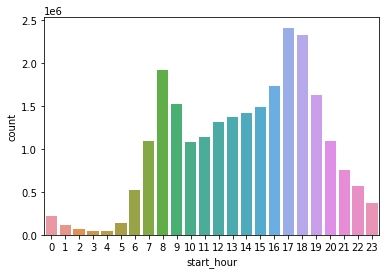

In [38]:
# Total No of trips by the hour:

sns.countplot(trips.start_hour)

In [39]:
# Morning and Evening hours are the busiest

<AxesSubplot:xlabel='startday', ylabel='count'>

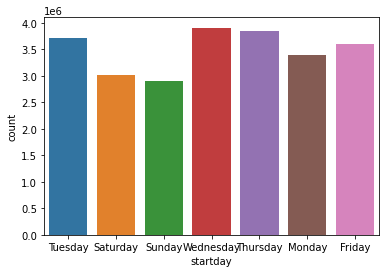

In [40]:
# Total No of trips by the weekday:

sns.countplot(data = trips, x = "startday")

<AxesSubplot:xlabel='startday', ylabel='count'>

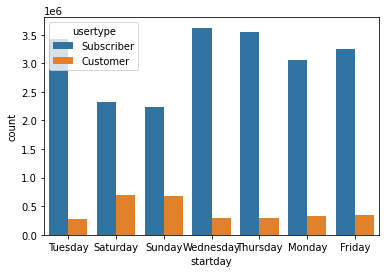

In [41]:
# Weekdays are significantly higher than weekdays, how does type of user affect this?,
# tourists are more likely to use on weekends:

sns.countplot(data = trips, x = "startday", hue = "usertype")

In [42]:
# While overall its the subscribers which are mostly using the service we can see that on a weekend there is a significant jump in customer volumes

In [43]:
trips.loc[trips['startday'].isin(['Saturday','Sunday']), 'weekend'] = 'weekend' 
trips.loc[~ trips['startday'].isin(['Saturday','Sunday']), 'weekend'] = 'weekday' 
trips.weekend.value_counts()

weekday    18462218
weekend     5919100
Name: weekend, dtype: int64

In [44]:
trips['startdate'] = trips.starttime.dt.date

In [45]:
# Bike Ride Volummes by day of the month and overall as a time trend
#sns.countplot(data = trips, x = "start_day")

In [46]:
#sns.countplot(data = trips, x = ["start_year","start_month"])

In [47]:
# overall ridership volume for 2016-2017 - lets see the time trend

In [48]:
timetrend = DataFrame(trips.groupby(['startdate']).size())

In [49]:
timetrend.reset_index(inplace = True)
timetrend.columns = ['startdate','trips']
timetrend

,startdate,trips
0,2016-01-01,11009
1,2016-01-02,14587
2,2016-01-03,15499
3,2016-01-04,19593
4,2016-01-05,18053
...,...,...
540,2017-12-27,16365
541,2017-12-28,13420
542,2017-12-29,13759
543,2017-12-30,5956


<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='startdate', ylabel='trips'>

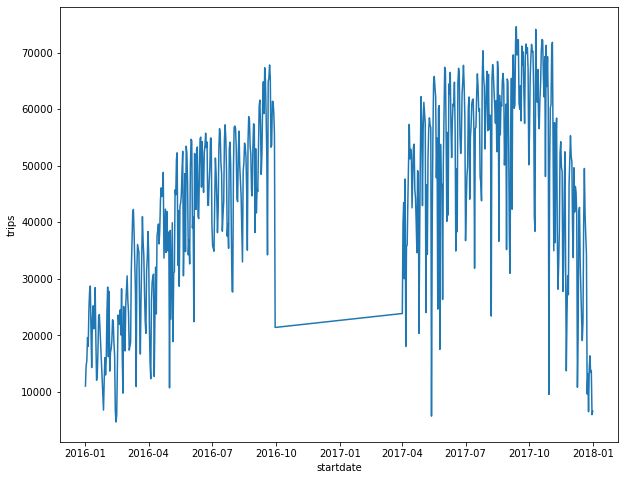

In [50]:
plt.figure(figsize=(10,8))
sns.lineplot(data = timetrend, x= 'startdate', y= 'trips')

In [51]:
# There seems to be some missing data (missing dates) from oct 2016 to march 2017, there is a good increase in no of trips in later 2016,
# trips were constant from may 2017 to oct 2017 and again started to decrease in 2017

In [52]:
pd.set_option('display.max_columns', 500)

In [53]:
trips.head()
trips.customer_plan.value_counts()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,duration,startday,start_month,start_year,start_day,start_hour,weekend,startdate
0,479,2017-10-10 21:45:54,2017-10-10 21:53:53,261,Johnson St & Gold St,40.694749,-73.983625,407,Henry St & Poplar St,40.700469,-73.991454,18105,Subscriber,1990.0,male,,7.983333,Tuesday,10,2017,10,21,weekday,2017-10-10
1,1632,2016-08-20 16:06:24,2016-08-20 16:33:36,499,Broadway & W 60 St,40.769155,-73.981918,3137,5 Ave & E 73 St,40.772828,-73.966853,24076,Customer,NaN,unknown,,27.200000,Saturday,8,2016,20,16,weekend,2016-08-20
2,155,2017-08-27 01:10:41,2017-08-27 01:13:16,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,-73.958509,27137,Subscriber,1982.0,male,,2.583333,Sunday,8,2017,27,1,weekend,2017-08-27
3,604,2016-03-30 09:01:47,2016-03-30 09:11:51,448,W 37 St & 10 Ave,40.756604,-73.997901,402,Broadway & E 22 St,40.740343,-73.989551,20825,Subscriber,1984.0,male,,10.066667,Wednesday,3,2016,30,9,weekday,2016-03-30
4,323,2016-06-15 23:48:59,2016-06-15 23:54:22,373,Willoughby Ave & Walworth St,40.693317,-73.953820,3061,Throop Ave & Myrtle Ave,40.696229,-73.943711,23032,Subscriber,1985.0,male,,5.383333,Wednesday,6,2016,15,23,weekday,2016-06-15


    24381318
Name: customer_plan, dtype: int64

In [54]:
trips['age'] = 2022 - trips.birth_year

In [55]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,duration,startday,start_month,start_year,start_day,start_hour,weekend,startdate,age
0,479,2017-10-10 21:45:54,2017-10-10 21:53:53,261,Johnson St & Gold St,40.694749,-73.983625,407,Henry St & Poplar St,40.700469,-73.991454,18105,Subscriber,1990.0,male,,7.983333,Tuesday,10,2017,10,21,weekday,2017-10-10,32.0
1,1632,2016-08-20 16:06:24,2016-08-20 16:33:36,499,Broadway & W 60 St,40.769155,-73.981918,3137,5 Ave & E 73 St,40.772828,-73.966853,24076,Customer,NaN,unknown,,27.200000,Saturday,8,2016,20,16,weekend,2016-08-20,NaN
2,155,2017-08-27 01:10:41,2017-08-27 01:13:16,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,-73.958509,27137,Subscriber,1982.0,male,,2.583333,Sunday,8,2017,27,1,weekend,2017-08-27,40.0
3,604,2016-03-30 09:01:47,2016-03-30 09:11:51,448,W 37 St & 10 Ave,40.756604,-73.997901,402,Broadway & E 22 St,40.740343,-73.989551,20825,Subscriber,1984.0,male,,10.066667,Wednesday,3,2016,30,9,weekday,2016-03-30,38.0
4,323,2016-06-15 23:48:59,2016-06-15 23:54:22,373,Willoughby Ave & Walworth St,40.693317,-73.953820,3061,Throop Ave & Myrtle Ave,40.696229,-73.943711,23032,Subscriber,1985.0,male,,5.383333,Wednesday,6,2016,15,23,weekday,2016-06-15,37.0


<AxesSubplot:>

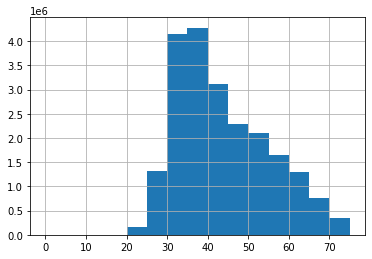

In [56]:
# checking the distribution by age:

trips.age.hist(bins = (0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75))

array([[<AxesSubplot:title={'center':'female'}>,
        <AxesSubplot:title={'center':'male'}>],
       [<AxesSubplot:title={'center':'unknown'}>, <AxesSubplot:>]],
      dtype=object)

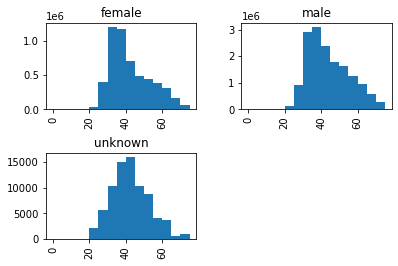

In [57]:
trips.hist(column = 'age', by = 'gender', bins = (0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75))

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='count'>

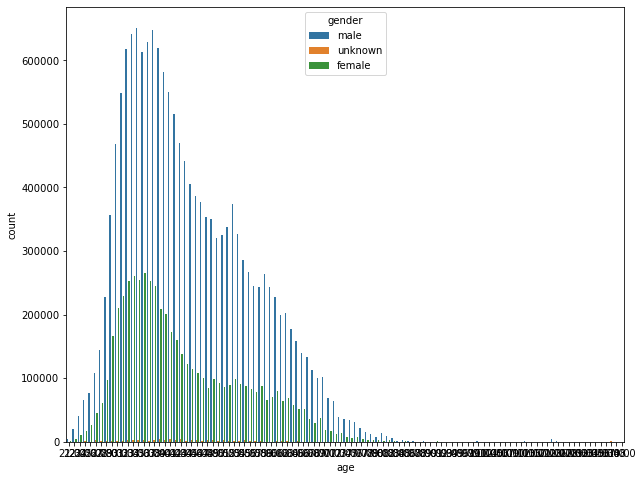

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(data = trips, hue='gender' , x = 'age')

In [59]:
# Max riders are between 30-40, females have slightly higher concentration of younger bike users than males
# also there are far more men than women using the service

In [60]:
# Next wek will check distribution of type of customers:

trips.usertype.value_counts(dropna = False)

Subscriber    21468341
Customer       2912977
Name: usertype, dtype: int64

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='birth_year', ylabel='count'>

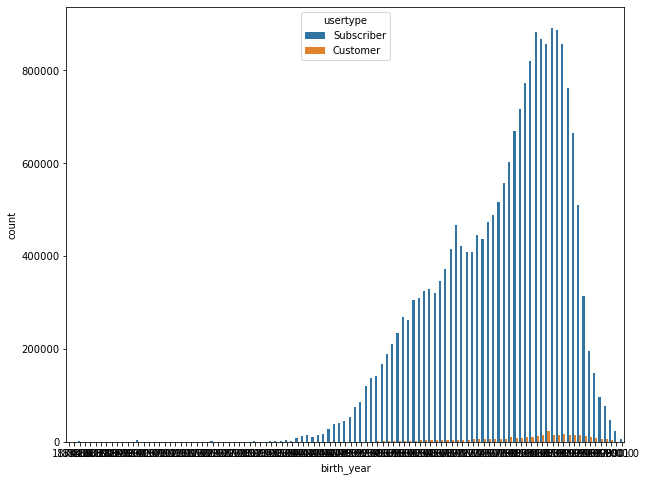

In [61]:
# Max are subscribers, is there an age pattern for customers vs subscribers, plot birth year vs usertpes
plt.figure(figsize=(10,8))
sns.countplot(data = trips, hue='usertype' , x = 'birth_year')

array([<AxesSubplot:title={'center':'Customer'}>,
       <AxesSubplot:title={'center':'Subscriber'}>], dtype=object)

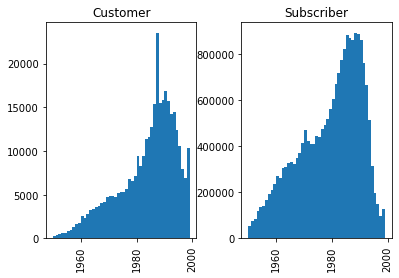

In [62]:
trips.hist(column = 'birth_year', by = 'usertype', bins = range(1950, 2000))

In [63]:
# Subscribers are slightly younger in age than customers, 
#this is not surprising since younger people would be more aware due to being more tech-savvy

In [64]:
# a lot of customers who use the service without registration and hence do not enter thier age correctly, which is reflected here as a peak in the graph

In [65]:
# Exploratory Analysis on top Stations - most used station, most popular trip by start and end station combinations

In [66]:
# Unique no of start stations and end stations:

trips.start_station_name.nunique()
trips.end_station_name.nunique()

855

897

In [67]:
# Trher are about 45 more unique end stations than start stations, these end stations could be popular tourist stops, 
# Deriving a column for such unique end stations

In [68]:
%%bigquery end_stations_only
SELECT distinct(end_station_name) FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
and end_station_name not in (select distinct(start_station_name) as end_station_name 
                             FROM `bigquery-public-data.new_york_citibike.citibike_trips`
                            where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31')

Downloading: 100%|██████████| 44/44 [00:01<00:00, 35.98rows/s]


In [69]:
%%bigquery end_stations_trips

with end_stations as 
(
SELECT distinct(end_station_name) FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
and end_station_name not in (select distinct(start_station_name) as end_station_name 
                             FROM `bigquery-public-data.new_york_citibike.citibike_trips`
                            where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31')    
)
,

temp1 as 
(
select * from  `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31' 
and end_station_name in (select end_station_name from end_stations)
)

select end_station_name, count(*) from temp1 group by 1


Downloading: 100%|██████████| 44/44 [00:01<00:00, 36.25rows/s]


,end_station_name,f0_
0,Grove St PATH,17
1,Heights Elevator,7
2,Essex Light Rail,37
3,NYCBS Depot - DEL,120
4,JC Medical Center,8


array([[<AxesSubplot:title={'center':'f0_'}>]], dtype=object)

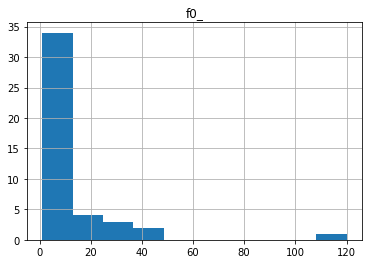

In [70]:
end_stations_trips.head()
end_stations_trips.hist()

array([[<AxesSubplot:title={'center':'trips'}>]], dtype=object)

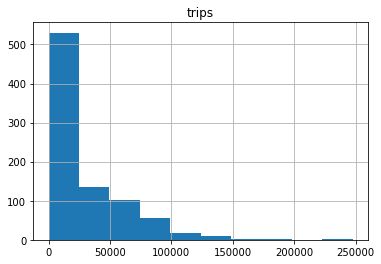

In [71]:
# We will first check what is the average trip volume per start station:

station_trip_vol = DataFrame(trips.groupby('start_station_name').size()).reset_index()
station_trip_vol.columns = ['start_station_name', 'trips']
station_trip_vol.hist()

In [72]:
station_trip_vol.describe()

,trips
count,855.000000
mean,28516.161404
std,33071.515666
min,1.000000
25%,3939.000000
50%,15280.000000
75%,44282.500000
max,247798.000000


In [73]:
# Mean trip vol is: 28000 trips, while median is 150000 trips per station, quite high, 
# we also observe that for the statons which are end_stations_only the trip volume is rather too low
# Next we get the most popular start and end stations and the correspondig trip volume
# FOr popular end stations we also get the corresponding trip volume where they are start startions


In [74]:
%%bigquery
SELECT start_station_name, count(*) FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
group by 1 order by count(*) desc limit 20

Downloading: 100%|██████████| 20/20 [00:01<00:00, 17.25rows/s]


,start_station_name,f0_
0,Pershing Square North,247798
1,West St & Chambers St,173585
2,E 17 St & Broadway,171454
3,W 21 St & 6 Ave,167069
4,Broadway & E 22 St,166948
5,8 Ave & W 33 St,143844
6,12 Ave & W 40 St,142770
7,W 20 St & 11 Ave,141493
8,Broadway & E 14 St,131412
9,Carmine St & 6 Ave,131369


In [75]:
%%bigquery

with popular_ends as
(
SELECT end_station_name, count(*) as trip_vol_as_end FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
group by 1 order by count(*) desc limit 20
),

t1 as 
(
select * from `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31' and
start_station_name in (select distinct(end_station_name) from popular_ends)
),

t2 as 
(
select start_station_name, count(*) as trip_vol_as_start from t1 group by 1
)

select A.* ,B.* from popular_ends as A left join t2 as B on A.end_station_name = B.start_station_name

Downloading: 100%|██████████| 20/20 [00:01<00:00, 16.10rows/s]


,end_station_name,trip_vol_as_end,start_station_name,trip_vol_as_start
0,Pershing Square North,243223,Pershing Square North,247798
1,West St & Chambers St,183436,West St & Chambers St,173585
2,E 17 St & Broadway,177088,E 17 St & Broadway,171454
3,Broadway & E 22 St,175061,Broadway & E 22 St,166948
4,W 21 St & 6 Ave,168672,W 21 St & 6 Ave,167069
5,W 20 St & 11 Ave,148703,W 20 St & 11 Ave,141493
6,12 Ave & W 40 St,147754,12 Ave & W 40 St,142770
7,8 Ave & W 33 St,139474,8 Ave & W 33 St,143844
8,Carmine St & 6 Ave,133427,Carmine St & 6 Ave,131369
9,Broadway & E 14 St,132010,Broadway & E 14 St,131412


In [76]:
# this is interesting, it seems that for these high volume stations, 
#there is a possibility that big chunk of trips where the start station is same as the end station
# or the popular stations are also popular as end stations for trips that start from other busy stations - we will see!
# We will do this analysis again where start_station_name is not equal to end_station_name
# also for getting the most popular trips we have to gove this condition that start_station_name is not equal to end_station_name

In [77]:
%%bigquery
SELECT start_station_name, count(*) FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
and start_station_name != end_station_name
group by 1 order by count(*) desc limit 20

Downloading: 100%|██████████| 20/20 [00:01<00:00, 16.87rows/s]


,start_station_name,f0_
0,Pershing Square North,246605
1,E 17 St & Broadway,169851
2,West St & Chambers St,168320
3,W 21 St & 6 Ave,165903
4,Broadway & E 22 St,165425
5,8 Ave & W 33 St,142707
6,W 20 St & 11 Ave,139540
7,12 Ave & W 40 St,136911
8,Broadway & E 14 St,130216
9,Carmine St & 6 Ave,129513


In [78]:
#!! Surprisingly the start station remain more of less the same even after removing the round trips!
#!! these stations are really the popular ones and they are also popular as end stations for trips from other busy stations - 
# this has to be the downtiown or the heart of the city
## Next we get the 20 most popular trips

In [79]:
%%bigquery
SELECT start_station_name, end_station_name, count(*) FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
and start_station_name != end_station_name
group by 1,2 order by count(*) desc limit 20


Downloading: 100%|██████████| 20/20 [00:01<00:00, 17.22rows/s]


,start_station_name,end_station_name,f0_
0,12 Ave & W 40 St,West St & Chambers St,9106
1,Central Park S & 6 Ave,5 Ave & E 78 St,8028
2,Central Park S & 6 Ave,5 Ave & E 88 St,7756
3,W 21 St & 6 Ave,9 Ave & W 22 St,7318
4,West St & Chambers St,12 Ave & W 40 St,7176
5,Soissons Landing,Yankee Ferry Terminal,6995
6,Yankee Ferry Terminal,Soissons Landing,6975
7,Pershing Square North,Broadway & W 32 St,6829
8,Central Park S & 6 Ave,5 Ave & E 73 St,6826
9,Pershing Square North,W 33 St & 7 Ave,6760


In [80]:
# We can see that there is a nice volume of trips with a different start and end station 
# Let us get the trips with the same start and end station and compare the volume

In [81]:
%%bigquery
SELECT start_station_name, end_station_name, count(*) FROM `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
and start_station_name = end_station_name
group by 1,2 order by count(*) desc limit 20

Downloading: 100%|██████████| 20/20 [00:01<00:00, 19.21rows/s]


,start_station_name,end_station_name,f0_
0,Central Park S & 6 Ave,Central Park S & 6 Ave,15116
1,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,8322
2,Centre St & Chambers St,Centre St & Chambers St,8278
3,Yankee Ferry Terminal,Yankee Ferry Terminal,6948
4,Soissons Landing,Soissons Landing,6322
5,12 Ave & W 40 St,12 Ave & W 40 St,5859
6,5 Ave & E 73 St,5 Ave & E 73 St,5798
7,Central Park West & W 72 St,Central Park West & W 72 St,5438
8,West St & Chambers St,West St & Chambers St,5265
9,Greenwich Ave & Charles St,Greenwich Ave & Charles St,4996


In [82]:
# There is good volume where start station = end station for the top 5 such cases

In [83]:
# Avg Distance of Trips - use latitude and longitude in the Haversine Formula
# python fucnction for it:

import numpy as np
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = \
    map(np.radians ,[lon1, lat1, lon2, lat2])
    h = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    miles = 3959 * (2 * np.arcsin(np.sqrt(h))) 
    return miles

haversine(40.74,-74.03,40.73,-73.97)

3.2165567335608567

In [84]:
# Using the Haversine function above to add the distance of the trip as a new column - giving memory error

#trips['trip_distance'] = trips.apply(lambda x: haversine(x.start_station_latitude, x.start_station_longitude, x.end_station_latitude, x.end_station_longitude), axis = 1)


In [85]:
# since the pythin dataframe is going out of memoery we will use the sql wqay to find the avg trip distance:

In [86]:
%%bigquery trip_distance_df

with temp1 as
(
select *,
st_distance(
    st_geogpoint(start_station_longitude, start_station_latitude),
    st_geogpoint(end_station_longitude, end_station_latitude)
  )/1000 as dist_in_kms

from  `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
)


select avg(dist_in_kms) as avg_dist from temp1 
#PERCENTILE_CONT(dist_in_kms, 0.5) OVER(PARTITION BY sex) from temp1

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.20s/rows]


In [87]:
trip_distance_df.head()


,avg_dist
0,1.877418


In [88]:
# Creating a cross join of all stations against all other stations:
# This can be used to find stations closest to each other as in the above query

In [89]:
stations.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720664,-73.985180,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743174,-74.003664,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01


In [90]:
%%bigquery closet_station_name_distance

with temp1 as
(
select A.station_id as A_station_id, A.name as A_station_name, A.latitude as A_latitude, A.longitude as A_longitude,
B.station_id as B_station_id, B.name as B_station_name, B.latitude as B_latitude, B.longitude as B_longitude,
st_distance(
    st_geogpoint(A.longitude, A.latitude),
    st_geogpoint(B.longitude, B.latitude)
  )/1000 as dist_in_kms

from  `bigquery-public-data.new_york_citibike.citibike_stations` as A left join `bigquery-public-data.new_york_citibike.citibike_stations` as B
on A.name != B.name
),

temp2 as 
(
select *, ROW_NUMBER() over (PARTITION by A_station_id order by dist_in_kms desc) as Row_no_dist from temp1
)

select * from temp2 where row_no_dist = 1


Downloading: 100%|██████████| 1584/1584 [00:01<00:00, 1313.67rows/s]


In [91]:
# We can see that there are some stations which are the closest in distance to many other stations!

In [92]:
closet_station_name_distance

,A_station_id,A_station_name,A_latitude,A_longitude,B_station_id,B_station_name,B_latitude,B_longitude,dist_in_kms,Row_no_dist
0,399,Lafayette Ave & St James Pl,40.688515,-73.964763,4583,W Mosholu Pkwy S & Sedgwick Ave,40.882260,-73.887020,22.515824,1
1,462,W 22 St & 10 Ave,40.746920,-74.004519,4583,W Mosholu Pkwy S & Sedgwick Ave,40.882260,-73.887020,18.007063,1
2,466,W 25 St & 6 Ave,40.743954,-73.991449,4583,W Mosholu Pkwy S & Sedgwick Ave,40.882260,-73.887020,17.712951,1
3,4009,Riverside Dr & W 145 St,40.827305,-73.951989,4417,67 St & Erik Pl,40.633385,-74.016562,22.238845,1
4,4024,Macombs Pl & W 152 St,40.826406,-73.937948,4417,67 St & Erik Pl,40.633385,-74.016562,22.461978,1
...,...,...,...,...,...,...,...,...,...,...
1579,4550,Webster Ave & Ford St,40.855560,-73.896150,4417,67 St & Erik Pl,40.633385,-74.016562,26.706312,1
1580,4560,Grand Concourse & E 192 St,40.864480,-73.895220,4417,67 St & Erik Pl,40.633385,-74.016562,27.655015,1
1581,4569,E 201 St & Briggs Ave,40.872070,-73.884590,4417,67 St & Erik Pl,40.633385,-74.016562,28.774648,1
1582,4627,Aqueduct Ave & North St,40.860479,-73.905717,4417,67 St & Erik Pl,40.633385,-74.016562,26.922884,1


In [93]:
##########################################################################################

In [94]:
l1 = list(end_stations_only.end_station_name)
l1

['Essex Light Rail',
 'JC Medical Center',
 'Heights Elevator',
 'Liberty Light Rail',
 'Baldwin at Montgomery',
 "Washington Street (Don't Use)",
 'NYCBS Depot - DEL',
 'City Hall',
 'Newport PATH',
 'Communipaw & Berry Lane',
 'Grove St PATH',
 'Newark Ave',
 'Harborside',
 'Paulus Hook',
 'Riverview Park',
 'Exchange Place',
 'Morris Canal',
 'Marin Light Rail',
 'Van Vorst Park',
 'Newport Pkwy',
 'Dixon Mills',
 'Hamilton Park',
 'Warren St',
 'North St',
 'Harborsid',
 'Pathmark Depot',
 'Jersey & 3rd',
 'Jersey & 6th St',
 'SSP - Basement',
 'Columbus Drive',
 'Dey St',
 'Leonard Gordon Park',
 'Hilltop',
 'Astor Place',
 'York St',
 'Union St',
 '5 Corners Library',
 'Lafayette Park',
 'Manila & 1st',
 'E 15 St & Irving Pl',
 'NYCBS Depot - GOW Annex',
 'Monmouth and 6th',
 'NJCU',
 'Brunswick St']

In [95]:
# Final Dataframe of this analysis: will do this both in sql query

#I have put together a final dataframe which has these columns at for every station in order to aid the decision making
#Station_id, Station_name, Station_location (lat & lon), Annual Ridership - Sum of rides originating from the station + sum of rides returning to the staton,, Overall Ridership % of the entire network, no of bikes, no of docks, 
#Based on my assumptions on Revenue per ride, fixed and variable costs - it can be easily calculated whenter a station is profitable or not and my how much, what is its margin per ride, and the money saved in the near term  on closing it
#As mentioned before another factor in analysis is to keep in mind the average trip distance and whether there is a station closeby or not as it might not be worth closing a station which is very distant from others


In [96]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,duration,startday,start_month,start_year,start_day,start_hour,weekend,startdate,age
0,479,2017-10-10 21:45:54,2017-10-10 21:53:53,261,Johnson St & Gold St,40.694749,-73.983625,407,Henry St & Poplar St,40.700469,-73.991454,18105,Subscriber,1990.0,male,,7.983333,Tuesday,10,2017,10,21,weekday,2017-10-10,32.0
1,1632,2016-08-20 16:06:24,2016-08-20 16:33:36,499,Broadway & W 60 St,40.769155,-73.981918,3137,5 Ave & E 73 St,40.772828,-73.966853,24076,Customer,NaN,unknown,,27.200000,Saturday,8,2016,20,16,weekend,2016-08-20,NaN
2,155,2017-08-27 01:10:41,2017-08-27 01:13:16,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,-73.958509,27137,Subscriber,1982.0,male,,2.583333,Sunday,8,2017,27,1,weekend,2017-08-27,40.0
3,604,2016-03-30 09:01:47,2016-03-30 09:11:51,448,W 37 St & 10 Ave,40.756604,-73.997901,402,Broadway & E 22 St,40.740343,-73.989551,20825,Subscriber,1984.0,male,,10.066667,Wednesday,3,2016,30,9,weekday,2016-03-30,38.0
4,323,2016-06-15 23:48:59,2016-06-15 23:54:22,373,Willoughby Ave & Walworth St,40.693317,-73.953820,3061,Throop Ave & Myrtle Ave,40.696229,-73.943711,23032,Subscriber,1985.0,male,,5.383333,Wednesday,6,2016,15,23,weekday,2016-06-15,37.0


In [97]:
%%bigquery station_final_stats

with annual_trips_total as
(
select count(*) as annual_trips_total_network
from  `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
),

start_trips_station as
(
select start_station_name, count(*) as annual_ridership_station_start
from  `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
group by 1
),

end_trips_station as
(
select end_station_name, count(*) as annual_ridership_station_end
from  `bigquery-public-data.new_york_citibike.citibike_trips`
where date(starttime) >= '2016-01-01' and date(starttime) <= '2017-12-31'
group by 1
),

station_info as 

(
select name as station_name, latitude, longitude, 
num_bikes_available + num_bikes_disabled as num_bikes, num_docks_available + num_docks_disabled as num_docks
FROM `bigquery-public-data.new_york_citibike.citibike_stations` 
)

select coalesce(A.start_station_name, B.end_station_name) as station_name_
,annual_ridership_station_start
, annual_ridership_station_end
, annual_ridership_station_start + annual_ridership_station_end as annual_ridership_station
, C.annual_trips_total_network
, (annual_ridership_station_start + annual_ridership_station_end)/ C.annual_trips_total_network * 100 as perc_of_total_by_station,
D.*
from start_trips_station as A
full outer join end_trips_station as B on A.start_station_name = B.end_station_name
left join annual_trips_total as C on 1=1 
left join station_info as D on coalesce(A.start_station_name, B.end_station_name) = D.station_name


Downloading: 100%|██████████| 899/899 [00:01<00:00, 732.70rows/s]


In [98]:
station_final_stats

,station_name_,annual_ridership_station_start,annual_ridership_station_end,annual_ridership_station,annual_trips_total_network,perc_of_total_by_station,station_name,latitude,longitude,num_bikes,num_docks
0,W 78 St & Broadway,32612.0,31458.0,64070.0,24381318,0.262783,None,NaN,NaN,NaN,NaN
1,Pershing Square North,247798.0,243223.0,491021.0,24381318,2.013923,None,NaN,NaN,NaN,NaN
2,W 53 St & 10 Ave,56685.0,55752.0,112437.0,24381318,0.461160,W 53 St & 10 Ave,40.766697,-73.990617,29.0,0.0
3,W 13 St & 5 Ave,60768.0,60903.0,121671.0,24381318,0.499034,W 13 St & 5 Ave,40.735445,-73.994310,5.0,24.0
4,Rivington St & Chrystie St,49485.0,50403.0,99888.0,24381318,0.409691,Rivington St & Chrystie St,40.721101,-73.991925,64.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
894,Morris Canal,NaN,27.0,NaN,24381318,NaN,Morris Canal,40.712419,-74.038526,14.0,0.0
895,Clinton St & Tillary St,21079.0,20851.0,41930.0,24381318,0.171976,Clinton St & Tillary St,40.696233,-73.991421,19.0,14.0
896,Johnson St & Gold St,21810.0,22130.0,43940.0,24381318,0.180220,Johnson St & Gold St,40.694749,-73.983625,23.0,18.0
897,37 Ave & 35 St,844.0,879.0,1723.0,24381318,0.007067,37 Ave & 35 St,40.753111,-73.927992,2.0,24.0


In [102]:
station_final_stats.sort_values(by = ['annual_ridership_station'], ascending = [False], inplace = True)

In [104]:
station_final_stats.reset_index(inplace = True)

In [107]:
station_final_stats['RANK'] = station_final_stats.index +1

In [111]:
station_final_stats.head()
station_final_stats.tail(100)

,index,station_name_,annual_ridership_station_start,annual_ridership_station_end,annual_ridership_station,annual_trips_total_network,perc_of_total_by_station,station_name,latitude,longitude,num_bikes,num_docks,RANK
0,1,Pershing Square North,247798.0,243223.0,491021.0,24381318,2.013923,None,NaN,NaN,NaN,NaN,1
1,336,West St & Chambers St,173585.0,183436.0,357021.0,24381318,1.464322,West St & Chambers St,40.717548,-74.013221,25.0,6.0,2
2,764,E 17 St & Broadway,171454.0,177088.0,348542.0,24381318,1.429545,E 17 St & Broadway,40.737050,-73.990093,47.0,19.0,3
3,337,Broadway & E 22 St,166948.0,175061.0,342009.0,24381318,1.402750,None,NaN,NaN,NaN,NaN,4
4,686,W 21 St & 6 Ave,167069.0,168672.0,335741.0,24381318,1.377042,W 21 St & 6 Ave,40.741740,-73.994156,11.0,39.0,5


,index,station_name_,annual_ridership_station_start,annual_ridership_station_end,annual_ridership_station,annual_trips_total_network,perc_of_total_by_station,station_name,latitude,longitude,num_bikes,num_docks,RANK
799,187,Pleasant Ave & E 120 St,314.0,341.0,655.0,24381318,0.002686,Pleasant Ave & E 120 St,40.797477,-73.931185,19.0,2.0,800
800,844,Lexington Ave & E 120 St,329.0,318.0,647.0,24381318,0.002654,Lexington Ave & E 120 St,40.801307,-73.939817,6.0,23.0,801
801,10,NYCBS Depot - STY - Garage 4,209.0,427.0,636.0,24381318,0.002609,None,NaN,NaN,NaN,NaN,802
802,491,28 St & 40 Ave,320.0,310.0,630.0,24381318,0.002584,None,NaN,NaN,NaN,NaN,803
803,859,Carroll St & Washington Ave,321.0,286.0,607.0,24381318,0.002490,Carroll St & Washington Ave,40.668674,-73.961815,10.0,17.0,804
804,404,Crescent St & 34 Ave,296.0,305.0,601.0,24381318,0.002465,Crescent St & 34 Ave,40.761080,-73.930562,20.0,7.0,805
805,481,Montgomery St & Franklin Ave OLD,264.0,273.0,537.0,24381318,0.002203,None,NaN,NaN,NaN,NaN,806
806,303,34 Ave & 13 St,258.0,272.0,530.0,24381318,0.002174,34 Ave & 13 St,40.763875,-73.936485,12.0,7.0,807
807,792,Adventures NYC,247.0,253.0,500.0,24381318,0.002051,None,NaN,NaN,NaN,NaN,808
808,878,Carroll St & Franklin Ave,248.0,245.0,493.0,24381318,0.002022,Carroll St & Franklin Ave,40.667941,-73.958800,5.0,14.0,809
